In [1]:
import cv2
import numpy as np

img = cv2.imread('/content/many_objects.jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

template = cv2.imread('/content/one_object.jpg', 0 )
w, h = template.shape[::-1]


In [2]:
# uses an equation where [SUM(actual_img - template)^2] is calculated
#if [SUM(actual_img - template)^2] == 0 then the img matching template is found

#we use the normalized correlation coefficient to determine how “similar” the pixel intensities of the two patches are:

res = cv2.matchTemplate(gray_img,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.9
loc = np.where( res >= threshold)

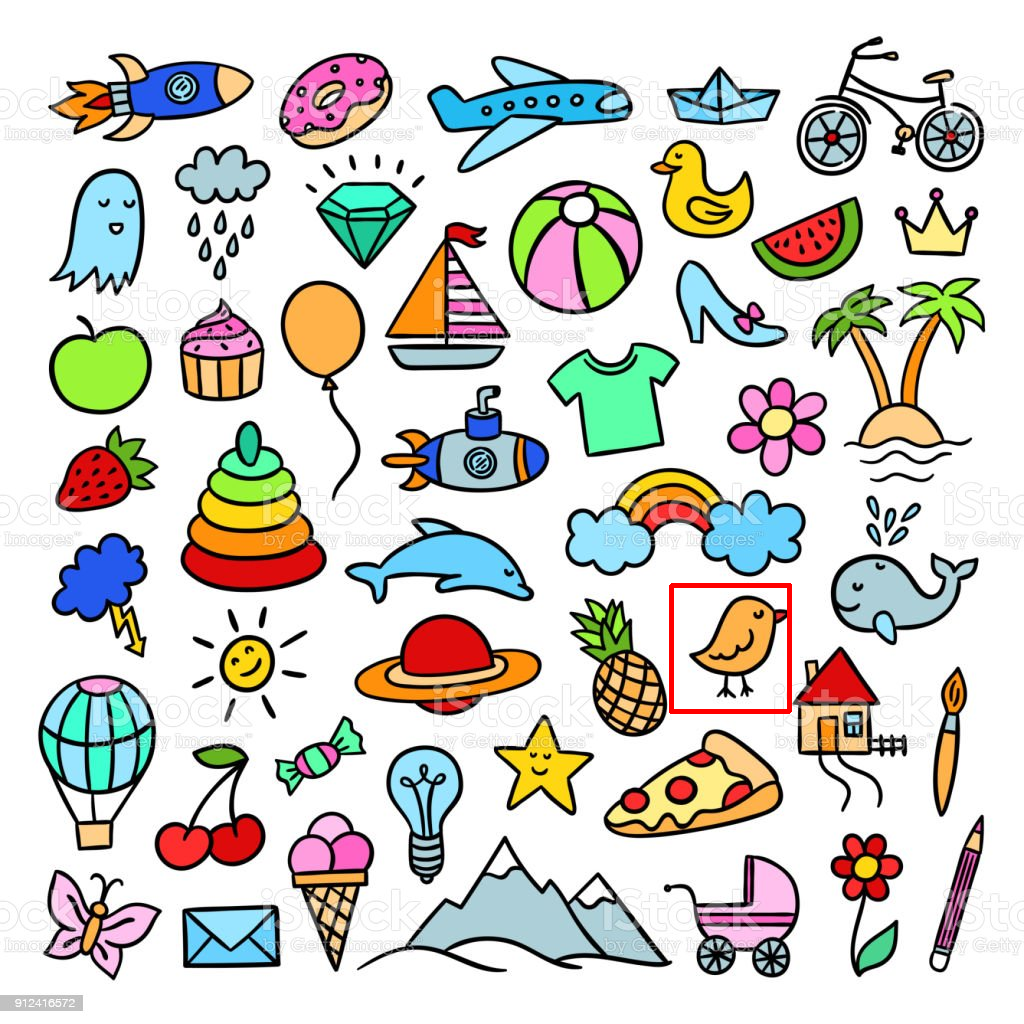

In [4]:
from google.colab.patches import cv2_imshow
#zip() returns an iterable, an object that can be used to loop over.
# It creates tuples of the input arguments and using for pt in it returns these one by one
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2_imshow(img)